In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('airline_passengers.csv')

In [3]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
df.drop(144,axis=0,inplace=True)

In [6]:
df.tail()

,Month,Thousands of Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


<Axes: >

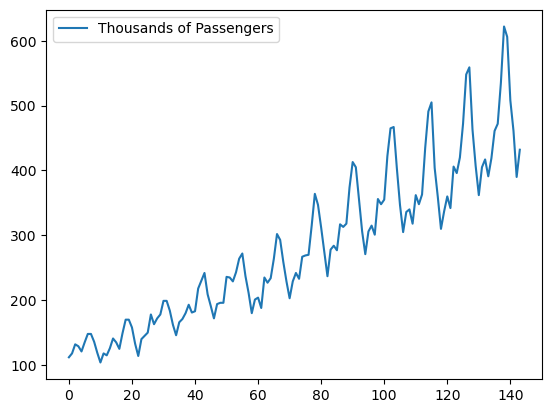

In [7]:
df.plot()

In [8]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [9]:
df['ds'] = pd.to_datetime(df['ds'])

In [10]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [11]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [12]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'p

In [13]:
# Initialize the Model
model=Prophet()

In [14]:
df.columns

Index(['ds', 'y'], dtype='object')

In [15]:
df.dropna(axis=0,inplace=True)

In [16]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [17]:
model.fit(df)

00:47:09 - cmdstanpy - INFO - Chain [1] start processing
00:47:10 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [19]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [20]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [21]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [22]:
prediction=model.predict(future_dates)

In [23]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.253948,55.981487,115.852767,107.253948,107.253948,-21.389753,-21.389753,-21.389753,-21.389753,-21.389753,-21.389753,0.0,0.0,0.0,85.864195
1,1949-02-01,109.404281,51.315667,109.343200,109.404281,109.404281,-30.067255,-30.067255,-30.067255,-30.067255,-30.067255,-30.067255,0.0,0.0,0.0,79.337026
2,1949-03-01,111.346517,82.531982,141.439211,111.346517,111.346517,-0.439217,-0.439217,-0.439217,-0.439217,-0.439217,-0.439217,0.0,0.0,0.0,110.907300
3,1949-04-01,113.496850,79.645403,136.124727,113.496850,113.496850,-4.957559,-4.957559,-4.957559,-4.957559,-4.957559,-4.957559,0.0,0.0,0.0,108.539291
4,1949-05-01,115.577817,84.842312,141.932849,115.577817,115.577817,-3.683712,-3.683712,-3.683712,-3.683712,-3.683712,-3.683712,0.0,0.0,0.0,111.894105


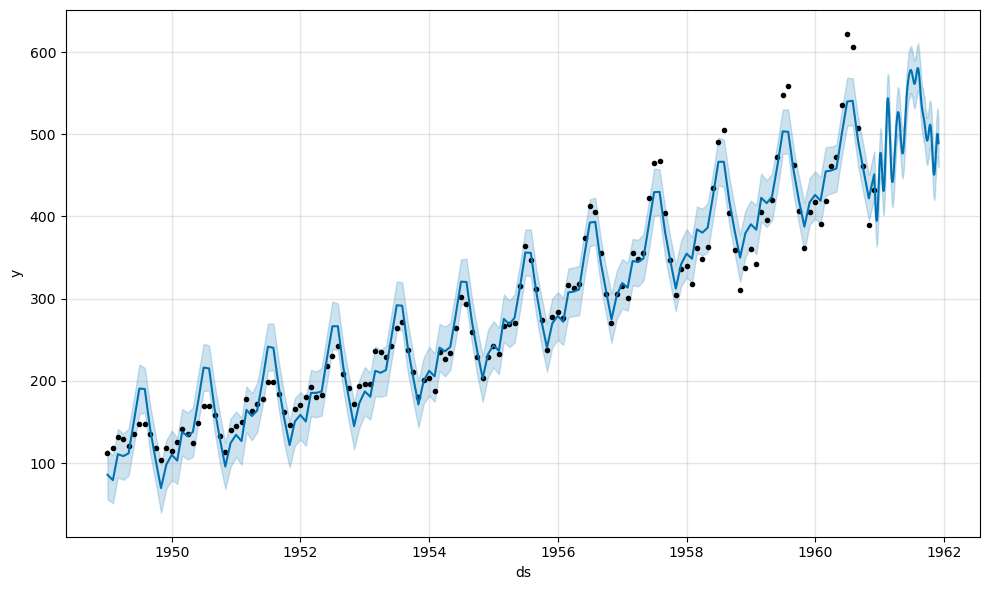

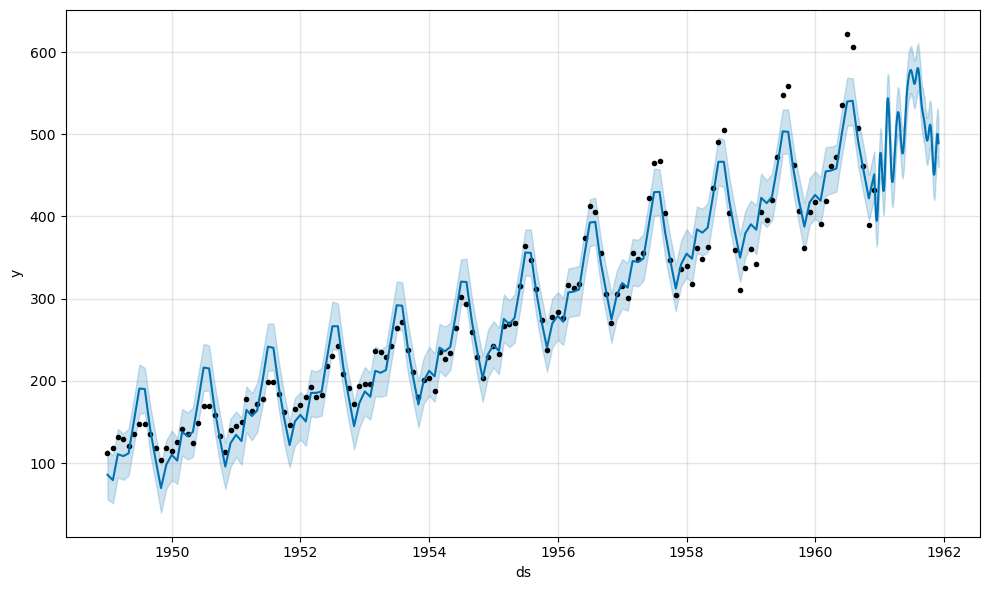

In [24]:
### plot the predicted projection
model.plot(prediction)

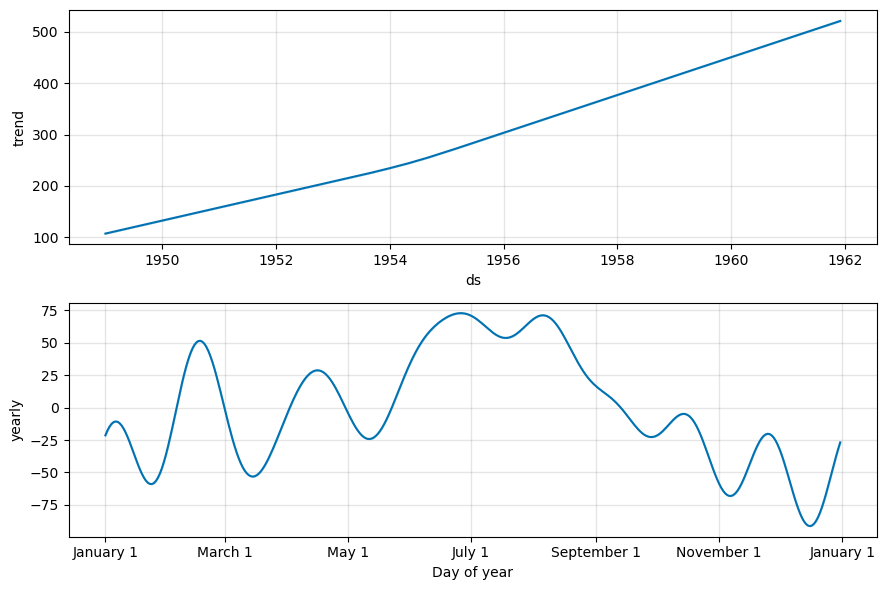

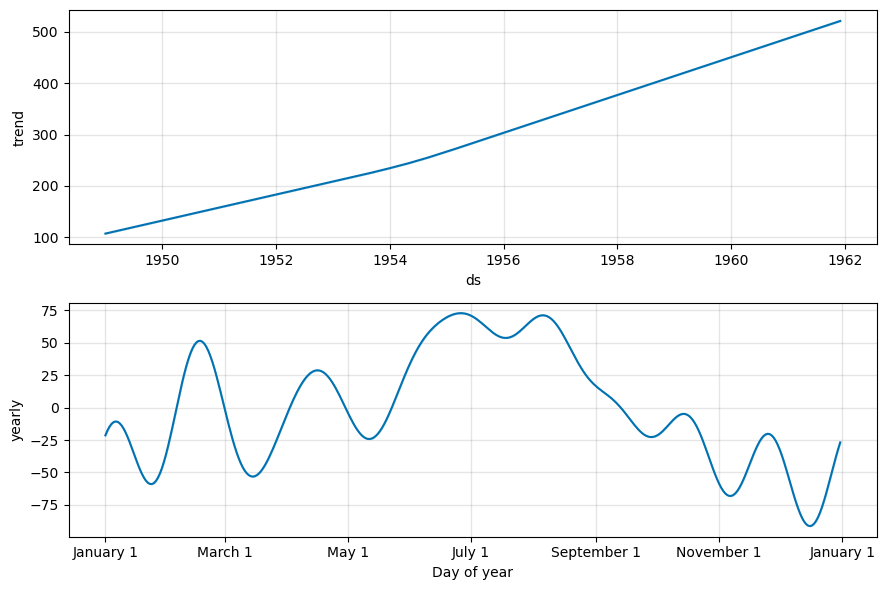

In [25]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

<b>Time Series Analysis</b>

<li>1960-1962</li>
<li>Cross Validation</li>
<li>1960-61---Train dataset</li>
<li>1961-62--Test dataset</li>
<li>1962-63---Validation</li>

In [26]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [27]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

  0%|          | 0/19 [00:00<?, ?it/s]

00:47:13 - cmdstanpy - INFO - Chain [1] start processing
00:47:40 - cmdstanpy - INFO - Chain [1] done processing
00:47:41 - cmdstanpy - INFO - Chain [1] start processing
00:47:42 - cmdstanpy - INFO - Chain [1] done processing
00:47:42 - cmdstanpy - INFO - Chain [1] start processing
00:47:43 - cmdstanpy - INFO - Chain [1] done processing
00:47:43 - cmdstanpy - INFO - Chain [1] start processing
00:47:44 - cmdstanpy - INFO - Chain [1] done processing
00:47:44 - cmdstanpy - INFO - Chain [1] start processing
00:47:45 - cmdstanpy - INFO - Chain [1] done processing
00:47:45 - cmdstanpy - INFO - Chain [1] start processing
00:47:46 - cmdstanpy - INFO - Chain [1] done processing
00:47:46 - cmdstanpy - INFO - Chain [1] start processing
00:47:47 - cmdstanpy - INFO - Chain [1] done processing
00:47:47 - cmdstanpy - INFO - Chain [1] start processing
00:47:48 - cmdstanpy - INFO - Chain [1] done processing
00:47:48 - cmdstanpy - INFO - Chain [1] start processing
00:47:49 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,156.331935,156.020450,156.618865,150.0,1951-01-18
1,1951-03-01,168.412096,167.364496,169.372853,178.0,1951-01-18
2,1951-04-01,156.473267,154.457587,158.345877,163.0,1951-01-18
3,1951-05-01,141.930814,138.703914,144.786983,172.0,1951-01-18
4,1951-06-01,176.324070,171.814692,180.327559,178.0,1951-01-18


In [28]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,1085.631035,32.948916,25.834811,0.078264,0.074159,0.079315,0.227273
1,42 days,1013.449205,31.834717,25.313719,0.077305,0.074159,0.078039,0.181818
2,46 days,910.733058,30.178354,24.816083,0.079634,0.084445,0.079389,0.136364
3,47 days,1044.100443,32.312543,27.007177,0.083023,0.085902,0.083147,0.136364
4,48 days,1032.879048,32.138436,26.418179,0.080921,0.085902,0.081121,0.181818


In [29]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,1085.631035,32.948916,25.834811,0.078264,0.074159,0.079315,0.227273
1,42 days,1013.449205,31.834717,25.313719,0.077305,0.074159,0.078039,0.181818
2,46 days,910.733058,30.178354,24.816083,0.079634,0.084445,0.079389,0.136364
3,47 days,1044.100443,32.312543,27.007177,0.083023,0.085902,0.083147,0.136364
4,48 days,1032.879048,32.138436,26.418179,0.080921,0.085902,0.081121,0.181818


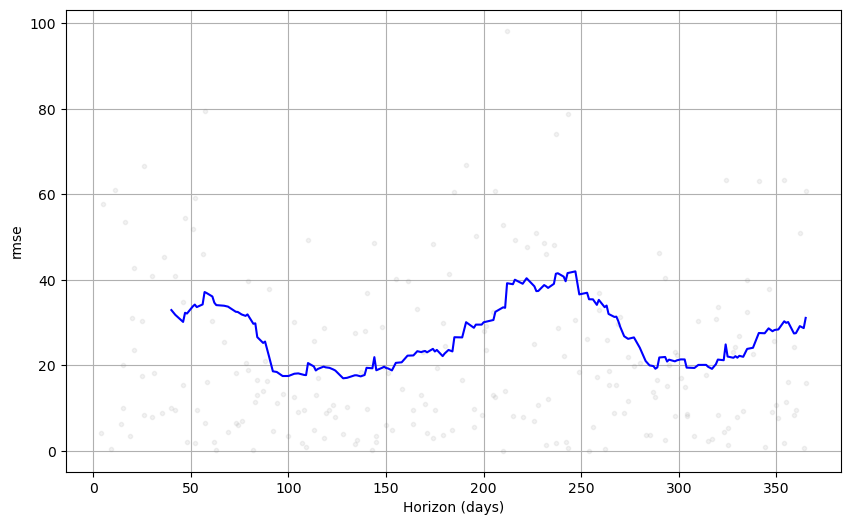

In [30]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')